<a href="https://colab.research.google.com/github/rbhargava03/astro100finalproject/blob/main/Ast100FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os

Mounted at /content/drive


In [2]:
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [12]:
## Putting Data in lists

dir = 'drive/MyDrive/Harvard/2025.0318'

bias_list = glob.glob(dir+"/*BIAS.fits")
flat_listV = glob.glob(dir+"/*FLATV.fits")
flat_listB = glob.glob(dir+"/*FLATB.fits")
flat_listB.remove("drive/MyDrive/Harvard/2025.0318/0212.FLATB.fits")
science_V = glob.glob(dir+"/0036.M67.fits")
science_B = glob.glob(dir+"/0049.M67.fits")

In [13]:
## Checking contents of the folders

print(bias_list)
print(flat_listV)
print(flat_listB)
print(science_V)
print(science_B)

['drive/MyDrive/Harvard/2025.0318/0002.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0166.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0164.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0224.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0161.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0003.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0160.BIAS.fits', 'drive/MyDrive/Harvard/2025.0318/0004.BIAS.fits']
['drive/MyDrive/Harvard/2025.0318/0221.FLATV.fits', 'drive/MyDrive/Harvard/2025.0318/0218.FLATV.fits', 'drive/MyDrive/Harvard/2025.0318/0217.FLATV.fits']
['drive/MyDrive/Harvard/2025.0318/0213.FLATB.fits', 'drive/MyDrive/Harvard/2025.0318/0211.FLATB.fits', 'drive/MyDrive/Harvard/2025.0318/0209.FLATB.fits', 'drive/MyDrive/Harvard/2025.0318/0207.FLATB.fits']
['drive/MyDrive/Harvard/2025.0318/0036.M67.fits']
['drive/MyDrive/Harvard/2025.0318/0049.M67.fits']


In [22]:
## Creating Master Bias

bdata_array_full_1 = []
bdata_array_full_2 = []
bdata_array_full_3 = []
bdata_array_full_4 = []

for i, fn in enumerate(bias_list):
    bdata1 = fits.getdata(fn,1)
    bdata_array_full_1.append(bdata1[None])

    bdata2 = fits.getdata(fn,2)
    bdata_array_full_2.append(bdata2[None])

    bdata3 = fits.getdata(fn,3)
    bdata_array_full_3.append(bdata3[None])

    bdata4 = fits.getdata(fn,4)
    bdata_array_full_4.append(bdata4[None])

bdata_array_full_1 = np.concatenate(bdata_array_full_1, axis=0)
master_bias_1 = np.median(bdata_array_full_1, axis=0)

bdata_array_full_2 = np.concatenate(bdata_array_full_2, axis=0)
master_bias_2 = np.median(bdata_array_full_2, axis=0)

bdata_array_full_3 = np.concatenate(bdata_array_full_3, axis=0)
master_bias_3 = np.median(bdata_array_full_3, axis=0)

bdata_array_full_4 = np.concatenate(bdata_array_full_4, axis=0)
master_bias_4 = np.median(bdata_array_full_4, axis=0)

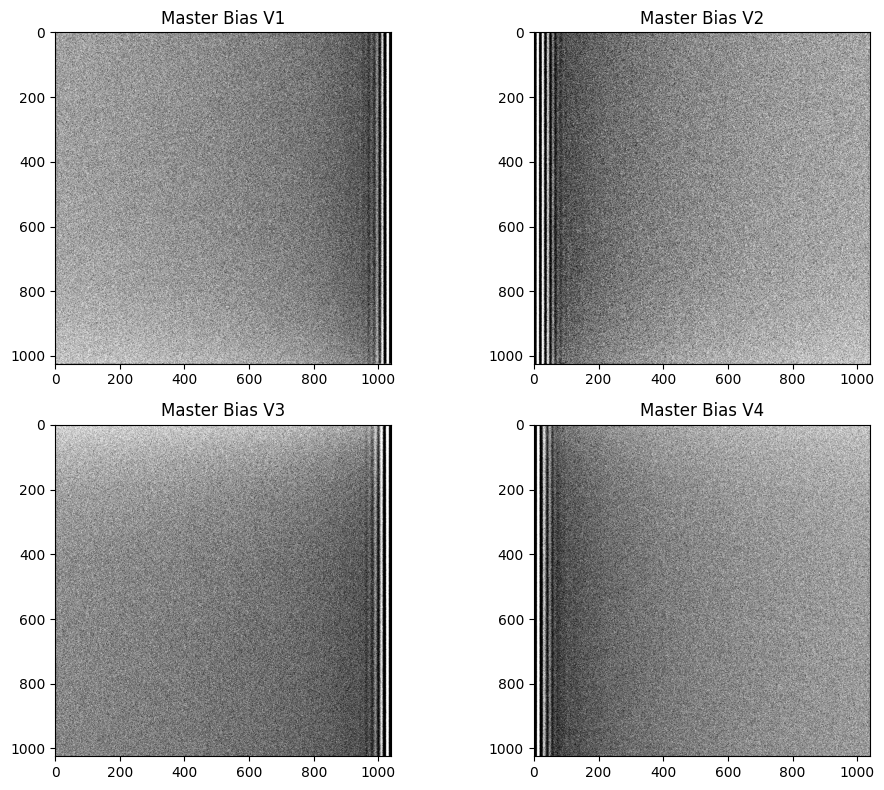

In [24]:
## Plot Master Bias

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(master_bias_1, cmap="gray", vmin=np.percentile(master_bias_1, 5), vmax=np.percentile(master_bias_1, 95))
plt.title("Master Bias V1")

plt.subplot(2, 2, 2)
plt.imshow(master_bias_2, cmap="gray", vmin=np.percentile(master_bias_2, 5), vmax=np.percentile(master_bias_2, 95))
plt.title("Master Bias V2")

plt.subplot(2, 2, 3)
plt.imshow(master_bias_3, cmap="gray", vmin=np.percentile(master_bias_3, 5), vmax=np.percentile(master_bias_3, 95))
plt.title("Master Bias V3")

plt.subplot(2, 2, 4)
plt.imshow(master_bias_4, cmap="gray", vmin=np.percentile(master_bias_4, 5), vmax=np.percentile(master_bias_4, 95))
plt.title("Master Bias V4")

plt.tight_layout()
plt.show()


In [17]:
## Creating Master Flats for V-band

fvdata_array_full_1 = []
fvdata_array_full_2 = []
fvdata_array_full_3 = []
fvdata_array_full_4 = []

for i, fn in enumerate(flat_listV):
    fvdata1 = fits.getdata(fn,1)
    fvdata_array_full_1.append(fvdata1[None])

    fvdata2 = fits.getdata(fn,2)
    fvdata_array_full_2.append(fvdata2[None])

    fvdata3 = fits.getdata(fn,3)
    fvdata_array_full_3.append(fvdata3[None])

    fvdata4 = fits.getdata(fn,4)
    fvdata_array_full_4.append(fvdata4[None])

fvdata_array_full_1 = np.concatenate(fvdata_array_full_1, axis=0)
master_flatv_1 = np.median(fvdata_array_full_1, axis=0)

fvdata_array_full_2 = np.concatenate(fvdata_array_full_2, axis=0)
master_flatv_2 = np.median(fvdata_array_full_2, axis=0)

fvdata_array_full_3 = np.concatenate(fvdata_array_full_3, axis=0)
master_flatv_3 = np.median(fvdata_array_full_3, axis=0)

fvdata_array_full_4 = np.concatenate(fvdata_array_full_4, axis=0)
master_flatv_4 = np.median(fvdata_array_full_4, axis=0)

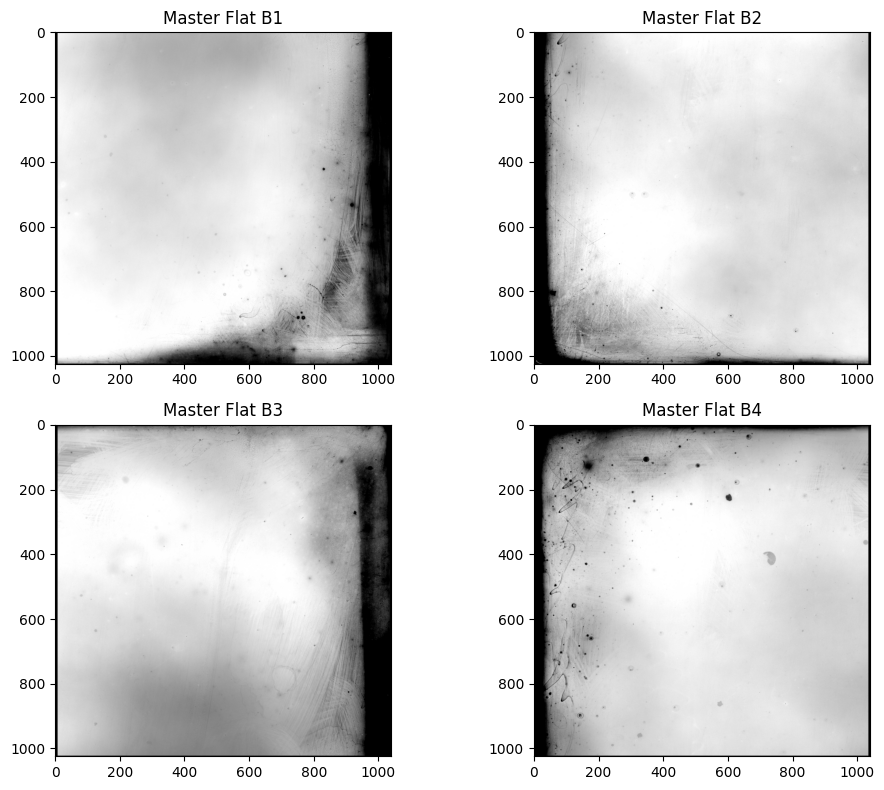

In [18]:
## Plot Master V flats

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(master_flatv_1, cmap="gray", vmin=np.percentile(master_flatv_1, 5), vmax=np.percentile(master_flatv_1, 95))
plt.title("Master Flat V1")

plt.subplot(2, 2, 2)
plt.imshow(master_flatv_2, cmap="gray", vmin=np.percentile(master_flatv_2, 5), vmax=np.percentile(master_flatv_2, 95))
plt.title("Master Flat V2")

plt.subplot(2, 2, 3)
plt.imshow(master_flatv_3, cmap="gray", vmin=np.percentile(master_flatv_3, 5), vmax=np.percentile(master_flatv_3, 95))
plt.title("Master Flat V3")

plt.subplot(2, 2, 4)
plt.imshow(master_flatv_4, cmap="gray", vmin=np.percentile(master_flatv_4, 5), vmax=np.percentile(master_flatv_4, 95))
plt.title("Master Flat V4")

plt.tight_layout()
plt.show()


In [15]:
## Creating Master Flats of B-band

fbdata_array_full_1 = []
fbdata_array_full_2 = []
fbdata_array_full_3 = []
fbdata_array_full_4 = []

for i, fn in enumerate(flat_listB):
    fbdata1 = fits.getdata(fn,1)
    fbdata_array_full_1.append(fbdata1[None])

    fbdata2 = fits.getdata(fn,2)
    fbdata_array_full_2.append(fbdata2[None])

    fbdata3 = fits.getdata(fn,3)
    fbdata_array_full_3.append(fbdata3[None])

    fbdata4 = fits.getdata(fn,4)
    fbdata_array_full_4.append(fbdata4[None])

fbdata_array_full_1 = np.concatenate(fbdata_array_full_1, axis=0)
master_flatb_1 = np.median(fbdata_array_full_1, axis=0)

fbdata_array_full_2 = np.concatenate(fbdata_array_full_2, axis=0)
master_flatb_2 = np.median(fbdata_array_full_2, axis=0)

fbdata_array_full_3 = np.concatenate(fbdata_array_full_3, axis=0)
master_flatb_3 = np.median(fbdata_array_full_3, axis=0)

fbdata_array_full_4 = np.concatenate(fbdata_array_full_4, axis=0)
master_flatb_4 = np.median(fbdata_array_full_4, axis=0)

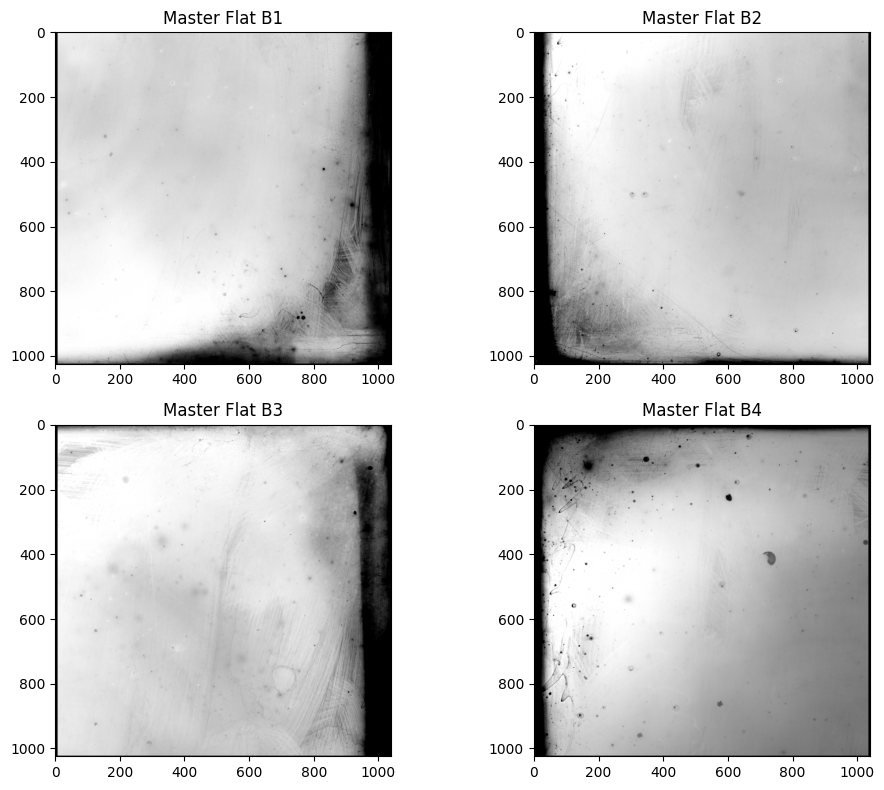

In [16]:
## Plot Master B flats

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(master_flatb_1, cmap="gray", vmin=np.percentile(master_flatb_1, 5), vmax=np.percentile(master_flatb_1, 95))
plt.title("Master Flat B1")

plt.subplot(2, 2, 2)
plt.imshow(master_flatb_2, cmap="gray", vmin=np.percentile(master_flatb_2, 5), vmax=np.percentile(master_flatb_2, 95))
plt.title("Master Flat B2")

plt.subplot(2, 2, 3)
plt.imshow(master_flatb_3, cmap="gray", vmin=np.percentile(master_flatb_3, 5), vmax=np.percentile(master_flatb_3, 95))
plt.title("Master Flat B3")

plt.subplot(2, 2, 4)
plt.imshow(master_flatb_4, cmap="gray", vmin=np.percentile(master_flatb_4, 5), vmax=np.percentile(master_flatb_4, 95))
plt.title("Master Flat B4")

plt.tight_layout()
plt.show()


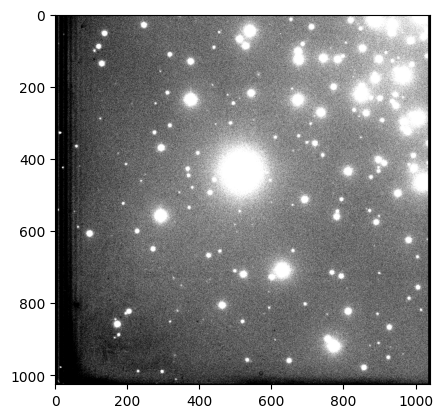

In [ ]:
science_V = glob.glob(dir+"/0036.M67.fits")
science_im_V1 = fits.getdata(science_V[0],1)
plt.imshow(science_im_V1, cmap="grey", vmax=np.percentile(science_im_V1,95), vmin=np.percentile(science_im_V1,5))

fits.getheader(science_V[0])

science_im_V2 = fits.getdata(science_V[0],2)
plt.imshow(science_im_V2, cmap="grey", vmax=np.percentile(science_im_V2,95), vmin=np.percentile(science_im_V2,5))


SIMPLE  =                    T / Primary FITS image array                       
BITPIX  =                   16                                                  
NAXIS   =                    0                                                  
EXTEND  =                    T / Fits standard                                  
OBJECT  = 'M67               ' / OBJECT NAME                                    
RA      = '08:51:23          ' / RA                                             
DEC     = '11:48:50          ' / DEC                                            
EPOCH   = '2000              ' / EPOCH                                          
AIR     = '1.06              ' / AIR MASS                                       
RRA     = '08:51:23          ' / RRA                                            
RDEC    = '11:48:50          ' / RDEC                                           
REPOCH  = '2000              ' / TEPOCH                                         
TRA     = '08:51:15.7       

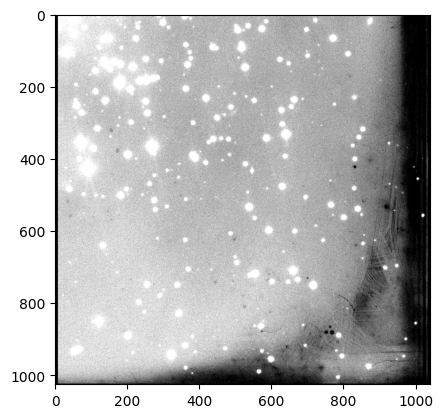

In [ ]:
science_B = glob.glob(dir+"/0049.M67.fits")
science_im_B1 = fits.getdata(science_B[0])
plt.imshow(science_im_B1, cmap="grey", vmax=np.percentile(science_im_B1,95), vmin=np.percentile(science_im_B1,5))

fits.getheader(science_B[0])